**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [89]:
from __future__ import print_function, division
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
s = json.load( open("fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  mplDeprecation)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['mod']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [90]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

Text(0.5,1,'Errorbar')

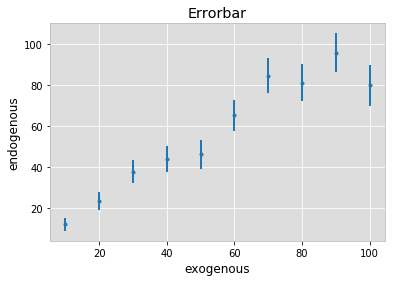

In [91]:
x = np.linspace(10,100,10)
y = line(1, x, 0, errors=errors)
pl.errorbar(x=x, y=y, yerr=errors(x), fmt='.')
plt.ylabel('endogenous')
plt.xlabel('exogenous')
plt.title('Errorbar')

# print y, x, and the result of applying statsmodels.api.add_constant() to x

In [92]:
y

array([ 12.06127466,  23.44550353,  37.88024874,  44.09875111,
        46.2485991 ,  65.35151536,  84.81603895,  81.30508943,
        95.98116288,  80.11227957])

In [93]:
x

array([  10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,   90.,  100.])

In [94]:
sm.add_constant(x)

array([[   1.,   10.],
       [   1.,   20.],
       [   1.,   30.],
       [   1.,   40.],
       [   1.,   50.],
       [   1.,   60.],
       [   1.,   70.],
       [   1.,   80.],
       [   1.,   90.],
       [   1.,  100.]])

# use statsmodels.api.OLS to fit x and y 
- *the wrong way*: by passing x as exogenous variable
- *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

print the model summary for each and discuss the differences

In [95]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     447.1
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           5.55e-09
Time:                        16:53:58   Log-Likelihood:                -36.022
No. Observations:                  10   AIC:                             74.04
Df Residuals:                       9   BIC:                             74.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.0082      0.048     21.145      0.000         0.900     1.116
==============================================================================
Omnibus:                       10.575   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                4.574
Skew:                          -1.380   Prob(JB):                        0.102
Kurtosis:                       4.833   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
#THE RIGHT WAY
smfit = smf.OLS(y, sm.add_constant(x)).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     80.81
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.87e-05
Time:                        16:57:05   Log-Likelihood:                -35.106
No. Observations:                  10   AIC:                             74.21
Df Residuals:                       8   BIC:                             74.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          7.8438      6.185      1.268      0.240        -6.419    22.107
x1             0.8961      0.100      8.990      0.000         0.666     1.126
==============================================================================
Omnibus:                        1.680   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.432   Jarque-Bera (JB):                0.301
Skew:                          -0.414   Prob(JB):                        0.860
Kurtosis:                       3.192   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# plot the data (as points) and both statsmodels fits

Text(0.5,1,'Data and statsmodels fits')

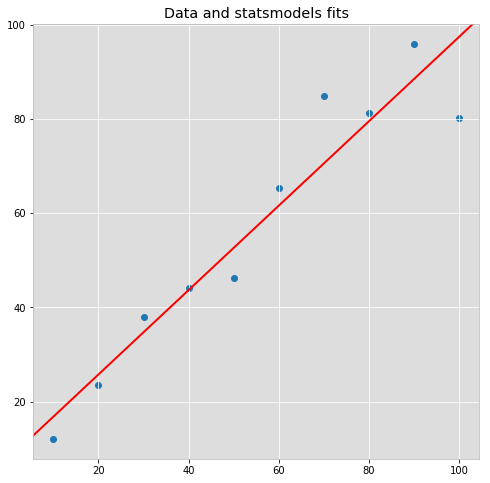

In [109]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x,y)
abline_plot(model_results=smfit, ax=ax, color='red')
plt.title('Data and statsmodels fits')

# create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0.5,1,'Errorbar')

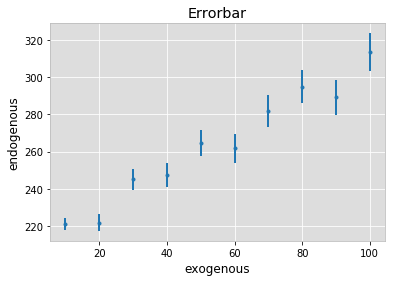

In [110]:
y_new = line(1, x, 211, errors=errors)
pl.errorbar(x=x, y=y_new, yerr=errors(x), fmt='.')
plt.ylabel('endogenous')
plt.xlabel('exogenous')
plt.title('Errorbar')

# repeat step 3

In [111]:
smfit_new = smf.OLS(y_new, sm.add_constant(x)).fit()
smfit_new.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     195.6
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           6.63e-07
Time:                        16:57:10   Log-Likelihood:                -31.803
No. Observations:                  10   AIC:                             67.61
Df Residuals:                       8   BIC:                             68.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        209.0364      4.445     47.024      0.000       198.786   219.287
x1             1.0019      0.072     13.985      0.000         0.837     1.167
==============================================================================
Omnibus:                        2.327   Durbin-Watson:                   3.255
Prob(Omnibus):                  0.312   Jarque-Bera (JB):                1.214
Skew:                          -0.550   Prob(JB):                        0.545
Kurtosis:                       1.694   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# repeat step 4

Text(0.5,1,'Data and statsmodels fits')

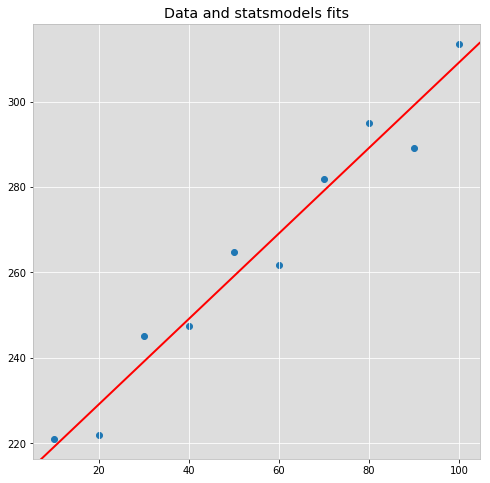

In [112]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x,y_new)
abline_plot(model_results=smfit_new, ax=ax, color='red')
plt.title('Data and statsmodels fits')

# now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [113]:
wls = smf.WLS(y_new, sm.add_constant(x)).fit()
wls.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            WLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     195.6
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           6.63e-07
Time:                        17:01:00   Log-Likelihood:                -31.803
No. Observations:                  10   AIC:                             67.61
Df Residuals:                       8   BIC:                             68.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        209.0364      4.445     47.024      0.000       198.786   219.287
x1             1.0019      0.072     13.985      0.000         0.837     1.167
==============================================================================
Omnibus:                        2.327   Durbin-Watson:                   3.255
Prob(Omnibus):                  0.312   Jarque-Bera (JB):                1.214
Skew:                          -0.550   Prob(JB):                        0.545
Kurtosis:                       1.694   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept

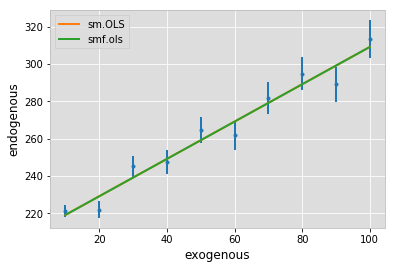

In [125]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y_new, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y_new, yerr=errors(x), fmt='.')
pl.plot(x, smfmodel.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();